In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('breast_cancer.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)

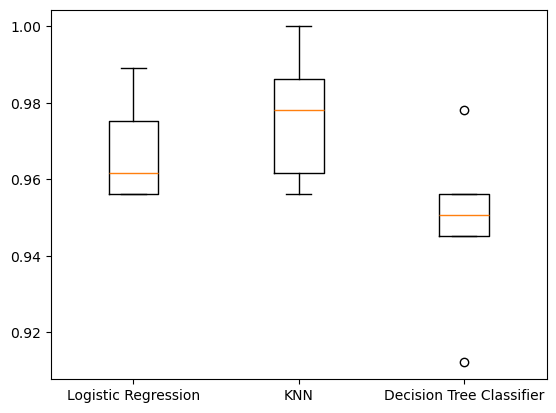

In [4]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

models = {"Logistic Regression": LogisticRegression(), "KNN": KNeighborsClassifier(), 
          "Decision Tree Classifier": DecisionTreeClassifier()}
results = []

for model in models.values(): 
    kf = KFold(n_splits=6, random_state=12, shuffle=True)
  
    cv_results = cross_val_score(model, X_train, y_train, cv=kf)
    results.append(cv_results)
    
plt.boxplot(results, tick_labels=models.keys())
plt.show()

In [5]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

steps = [("imp_mean", SimpleImputer()), 
         ("scaler", StandardScaler()), 
         ("knn", KNeighborsClassifier())]

pipeline = Pipeline(steps)

param_grid = {"knn__n_neighbors": np.arange(1, 51)}
kf = KFold(n_splits=10, random_state=12, shuffle=True)

grid_search = GridSearchCV(pipeline, param_grid, cv=kf)
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)
print(grid_search.best_score_)

Pipeline(steps=[('imp_mean', SimpleImputer()), ('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=np.int64(18)))])
0.9761279461279461


In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

y_pred = grid_search.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[79  2]
 [ 4 52]]
0.9562043795620438
              precision    recall  f1-score   support

           2       0.95      0.98      0.96        81
           4       0.96      0.93      0.95        56

    accuracy                           0.96       137
   macro avg       0.96      0.95      0.95       137
weighted avg       0.96      0.96      0.96       137

